## Crear una rosa de vientos
- para todo el año
- para el dia y la noche de todo el año
- para cada mes
- funcion de densidad de probabilidad (pdf)


In [1]:
# pip install windrose

In [2]:
import pandas as pd
from windrose import WindroseAxes
from windrose import WindAxes

import numpy as np
import calendar

In [3]:
file = "../data/001_raw/temixco.csv"

In [7]:
list(enumerate(pd.read_csv(file, nrows=0).columns))

[(0, 'time'),
 (1, 'Ib'),
 (2, 'Ig'),
 (3, 'To'),
 (4, 'RH'),
 (5, 'WS'),
 (6, 'WD'),
 (7, 'P')]

In [8]:
tmx = pd.read_csv(file, index_col=0, parse_dates=True, usecols=[0,5,6])
tmx

,WS,WD
time,,
2018-01-01 00:00:00,1.422,316.0
2018-01-01 00:10:00,1.008,283.7
2018-01-01 00:20:00,1.565,326.0
2018-01-01 00:30:00,2.175,354.5
2018-01-01 00:40:00,1.902,348.0
...,...,...
2018-12-31 23:10:00,1.715,332.2
2018-12-31 23:20:00,1.703,320.5
2018-12-31 23:30:00,2.887,335.7


In [9]:
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WS      52560 non-null  float64
 1   WD      52560 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [10]:
tmx.dtypes

WS    float64
WD    float64
dtype: object

In [11]:
tmx.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:20:00', '2018-12-31 22:30:00',
               '2018-12-31 22:40:00', '2018-12-31 22:50:00',
               '2018-12-31 23:00:00', '2018-12-31 23:10:00',
               '2018-12-31 23:20:00', '2018-12-31 23:30:00',
               '2018-12-31 23:40:00', '2018-12-31 23:50:00'],
              dtype='datetime64[ns]', name='time', length=52560, freq=None)

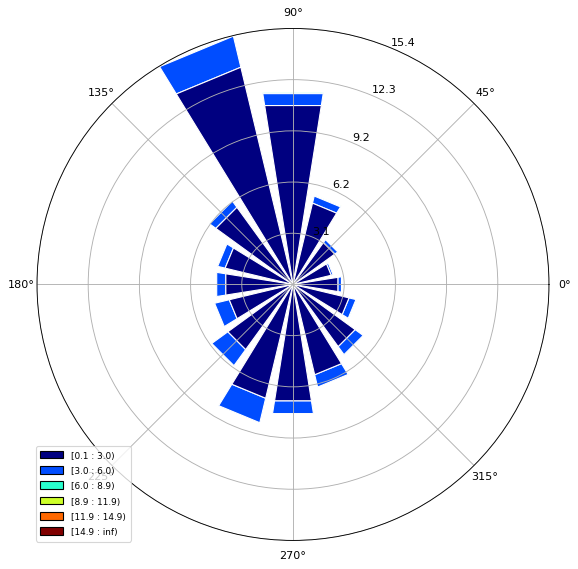

In [16]:
ax = WindroseAxes.from_ax()
ax.bar(tmx.WD, tmx.WS, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

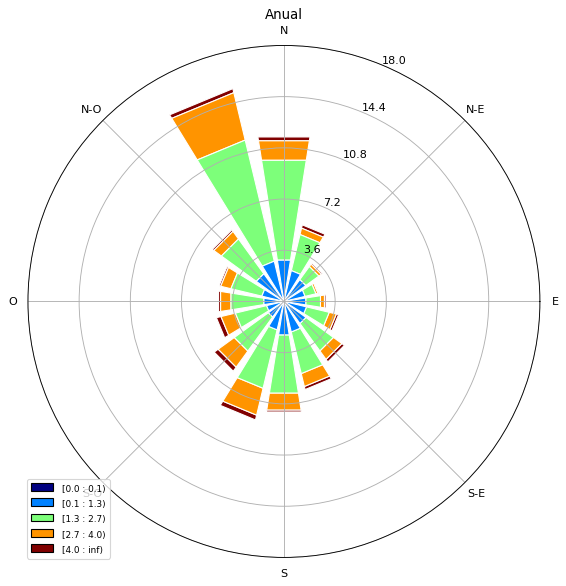

In [22]:
ax = WindroseAxes.from_ax(rmax=18, theta_labels = ["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title("Anual")
rangos = [0., 0.1, 1.34,2.67,4]

ax.bar(tmx.WD, tmx.WS, bins=rangos, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

In [26]:
tmx.between_time("0:00:00","7:59:59")

,WS,WD
time,,
2018-01-01 00:00:00,1.422,316.000
2018-01-01 00:10:00,1.008,283.700
2018-01-01 00:20:00,1.565,326.000
2018-01-01 00:30:00,2.175,354.500
2018-01-01 00:40:00,1.902,348.000
2018-01-01 00:50:00,1.468,6.668
2018-01-01 01:00:00,1.368,11.670
2018-01-01 01:10:00,1.122,3.498
2018-01-01 01:20:00,0.332,64.510


In [27]:
tmx.between_time("20:00:00","23:59:59")

,WS,WD
time,,
2018-01-01 20:00:00,0.797,339.40
2018-01-01 20:10:00,0.735,333.30
2018-01-01 20:20:00,0.888,41.76
2018-01-01 20:30:00,3.945,69.50
2018-01-01 20:40:00,1.357,58.80
...,...,...
2018-12-31 23:10:00,1.715,332.20
2018-12-31 23:20:00,1.703,320.50
2018-12-31 23:30:00,2.887,335.70


In [29]:
noche = pd.concat([tmx.between_time("0:00:00","7:59:59"),tmx.between_time("20:00:00","23:59:59")])

In [30]:
dia = tmx.between_time("8:00:00", "19:59:00")
dia

,WS,WD
time,,
2018-01-01 08:00:00,2.103,5.833
2018-01-01 08:10:00,2.042,8.500
2018-01-01 08:20:00,1.032,356.800
2018-01-01 08:30:00,1.225,354.500
2018-01-01 08:40:00,0.522,305.700
...,...,...
2018-12-31 19:10:00,1.637,357.500
2018-12-31 19:20:00,2.525,346.700
2018-12-31 19:30:00,2.982,338.500


In [54]:
tmx.describe()

,WS,WD
count,52560.00000,52560.000000
mean,1.90520,210.734453
std,1.04411,109.276328
min,0.05000,0.000000
25%,1.18000,134.675000
50%,1.78500,211.900000
75%,2.46000,319.800000
max,14.86000,360.000000


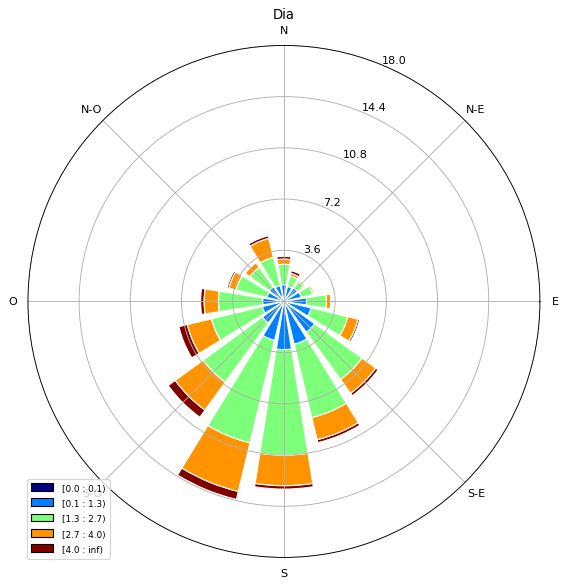

In [53]:
ax = WindroseAxes.from_ax(rmax=18, theta_labels = ["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title("Dia")
rangos = [0., 0.1, 1.34,2.67,4]

ax.bar(dia.WD, dia.WS, bins=rangos, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

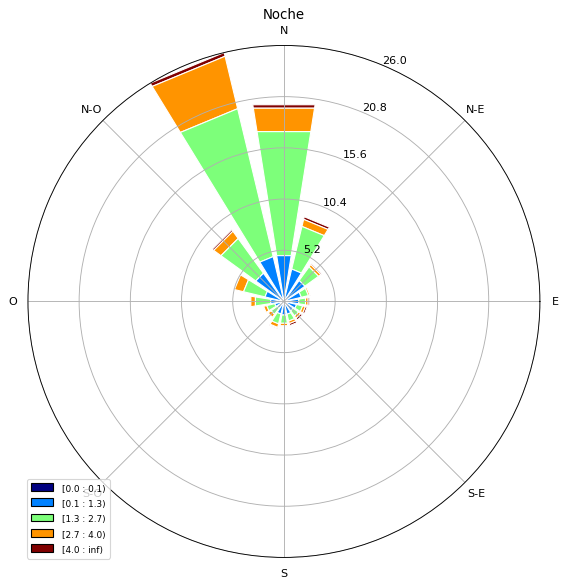

In [35]:
ax = WindroseAxes.from_ax(theta_labels = ["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
ax.set_title("Noche")
rangos = [0., 0.1, 1.34,2.67,4]

ax.bar(noche.WD, noche.WS, bins=rangos, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

In [38]:
calendar.month_name[1:]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [39]:
meses = calendar.month_name[1:]

In [41]:
tmx[tmx.index.month_name()=="January"]

,WS,WD
time,,
2018-01-01 00:00:00,1.422,316.0
2018-01-01 00:10:00,1.008,283.7
2018-01-01 00:20:00,1.565,326.0
2018-01-01 00:30:00,2.175,354.5
2018-01-01 00:40:00,1.902,348.0
...,...,...
2018-01-31 23:10:00,2.000,343.3
2018-01-31 23:20:00,1.797,348.2
2018-01-31 23:30:00,1.375,322.5


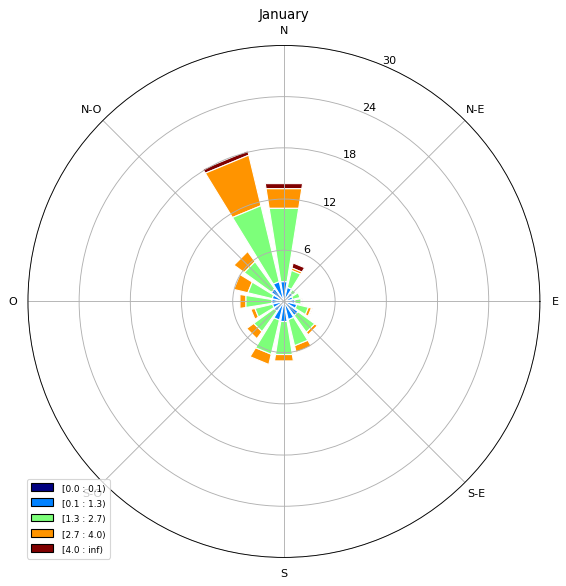

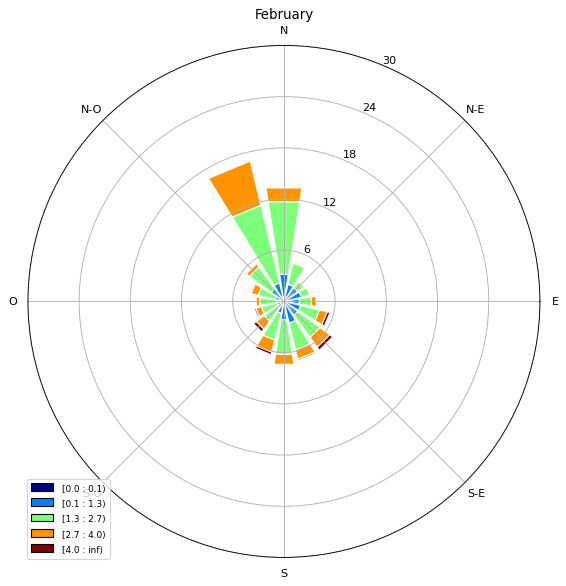

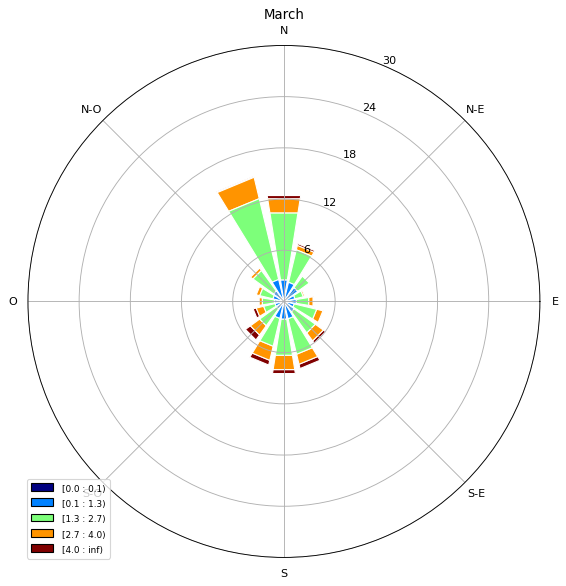

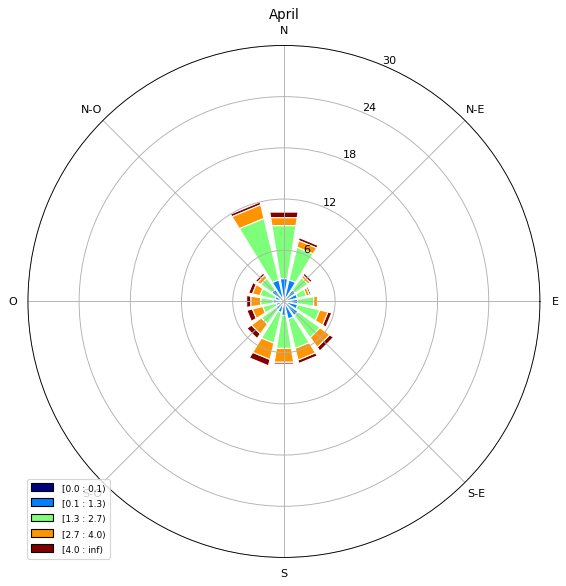

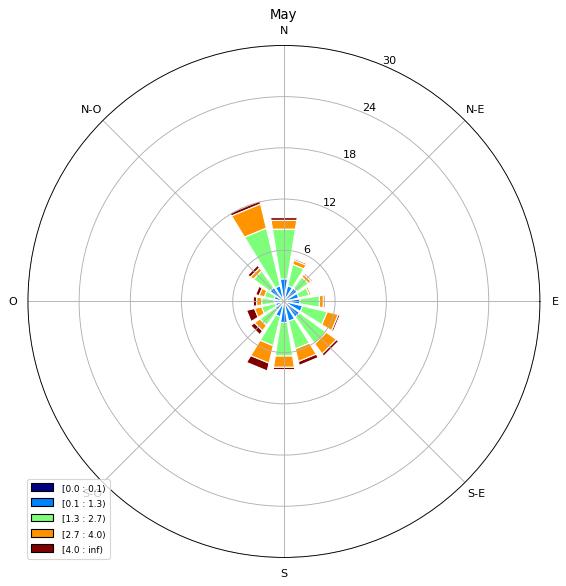

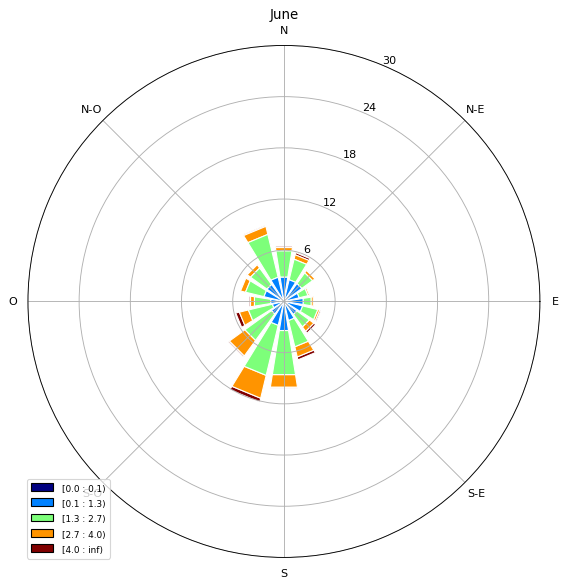

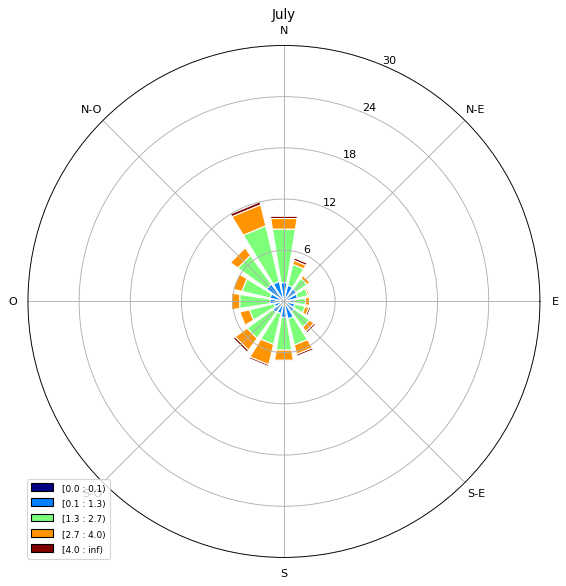

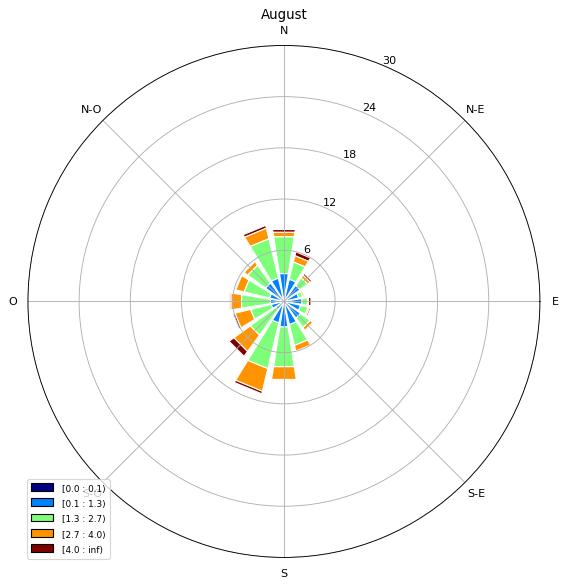

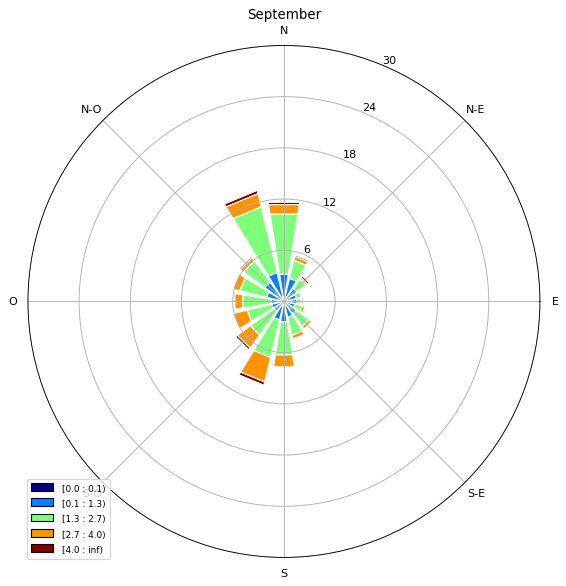

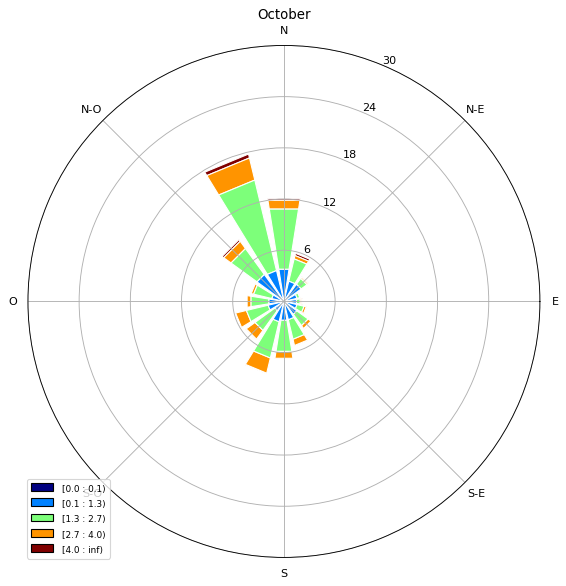

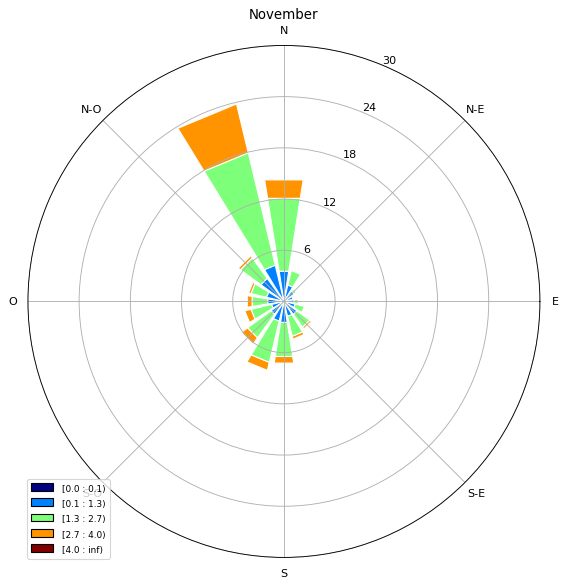

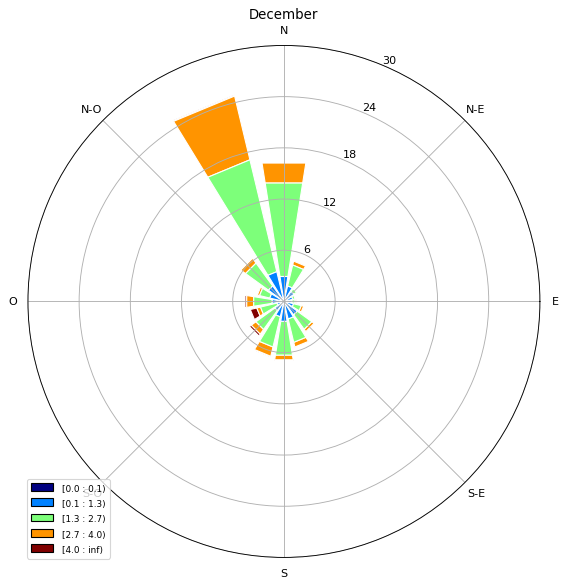

In [43]:
meses = calendar.month_name[1:]

for mes in meses:
    ax = WindroseAxes.from_ax(rmax=30, theta_labels = ["E", "N-E", "N", "N-O", "O", "S-O", "S", "S-E"])
    ax.set_title(mes)


    ax.bar(tmx[tmx.index.month_name()==mes].WD, tmx[tmx.index.month_name()==mes].WS, 
           bins=rangos, normed=True, opening=0.8, edgecolor="white")
    ax.set_legend()

C:\Users\dacr9\Documents\WPy64-3950\python-3.9.5.amd64\lib\site-packages\windrose\windrose.py:694: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(var, bins=bins, normed=True)


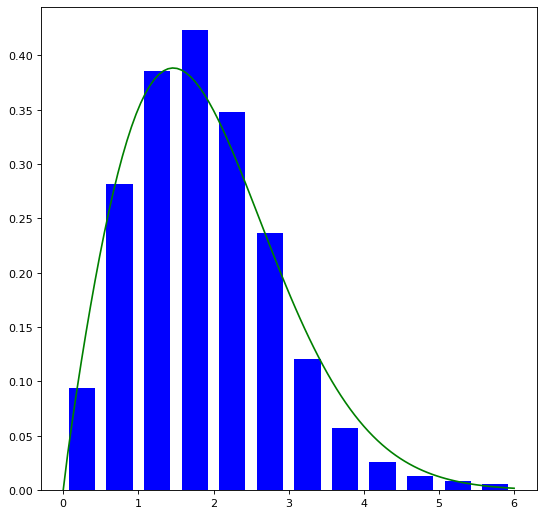

In [45]:
ax = WindAxes.from_ax()
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
ax, params = ax.pdf(tmx.WS, bins=bins)


In [46]:
bins 

[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

In [51]:
calendar.month_name[1:9:2] #slicing

['January', 'March', 'May', 'July']